## Quinine Standard Validation

Some packages you may need

In [19]:
install.packages("png")
install.packages("ggplot2")
install.packages("reshape")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Sample Preparation and Data Collection
---

A 1 ppm quinine stock solution was prepared by Jimena. We diluted this 1/20 to a concentration of 50 ppb with 0.050 M H2SO4. An unknown sample and control sample were prepared for standard addition in the following samples.

0. Blank (0.050 M H2SO4) 
1. 5 mL diluted Control
2. 5 mL diluted Control + 4 mL 50.00 µg/L quinine
3. 5 mL diluted U19C
4. 5 mL diluted U19C + 1 mL 50.00 µg/L quinine
5. 5 mL diluted U19C + 2 mL 50.00 µg/L quinine
6. 5 mL diluted U19C + 3 mL 50.00 µg/L quinine
7. 5 mL diluted U19C + 4 mL 50.00 µg/L quinine
8. 5 mL diluted U53A
9. 5 mL diluted U53A + 1 mL 50.00 µg/L quinine
10. 5 mL diluted U53A + 2 mL 50.00 µg/L quinine
11. 5 mL diluted U53A + 3 mL 50.00 µg/L quinine
12. 5 mL diluted U53A + 4 mL 50.00 µg/L quinine
13. 5 mL diluted U57B
14. 5 mL diluted U57B + 1 mL 50.00 µg/L quinine
15. 5 mL diluted U57B + 2 mL 50.00 µg/L quinine
16. 5 mL diluted U57B + 3 mL 50.00 µg/L quinine
17. 5 mL diluted U57B + 4 mL 50.00 µg/L quinine


Each sample was QS'd to 10 mL in a scintillation vial prior to fourescence measurement.

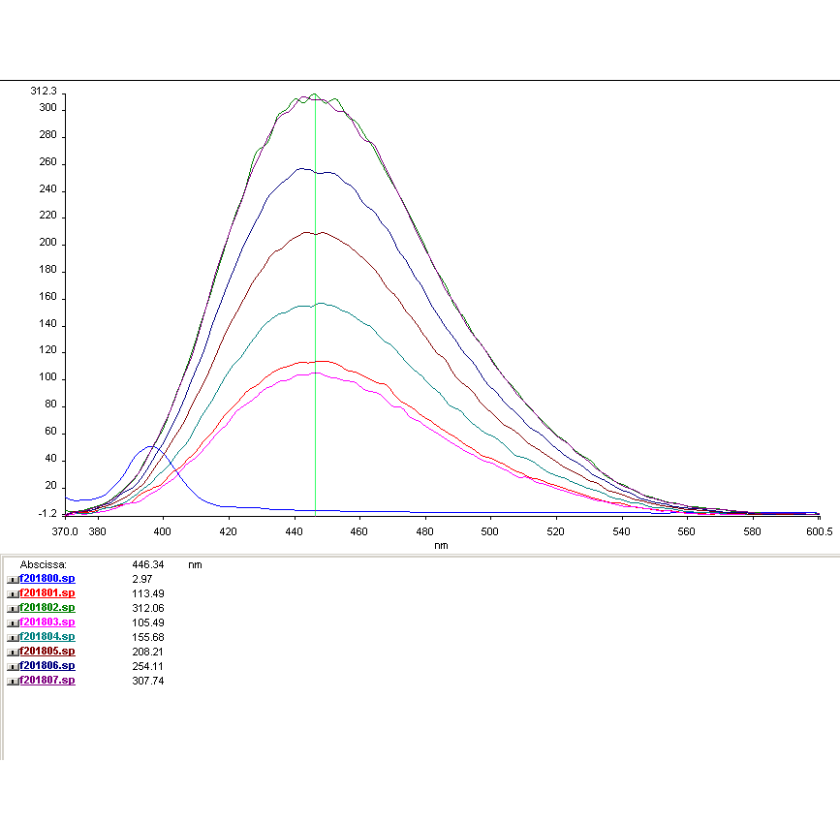

In [2]:
# Lets look at our png snip from the instrument computer
library(png)
img1 <- readPNG("./Fall2018_QunineValidation_top.PNG")
grid::grid.raster(img1)

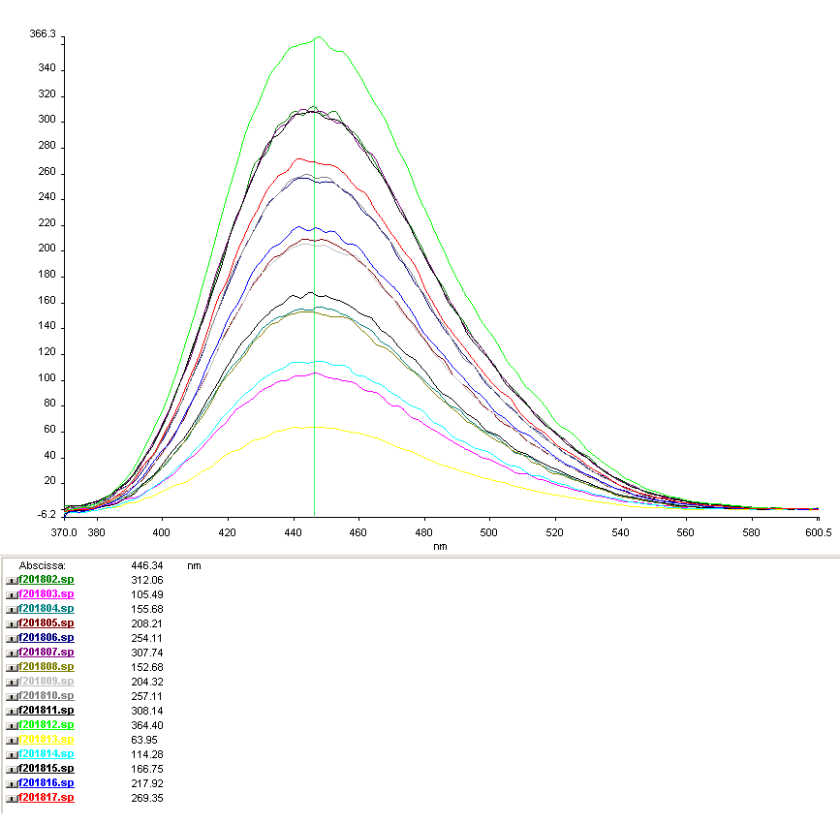

In [3]:
img2 <- readPNG("./Fall2018_QuinineValidation.PNG")
grid::grid.raster(img2)


In [14]:
# Since this was simply a screen shot we need to enter the data before performing some regression analysis.
blank <- 2.97
control <- c(113.49,312.06)
U19C <- c(105.49,155.68,208.21,254.11,307.74)
U53A <- c(152.68,204.32,257.11,308.14,364.40)
U57B <- c(69.95,114.28,166.75,217.92,269.35)

Q <- data.frame(U19C,U53A,U57B)
print("Control")
print(control)
print("")
print(Q)

[1] "Control"
[1] 113.49 312.06
[1] ""
    U19C   U53A   U57B
1 105.49 152.68  69.95
2 155.68 204.32 114.28
3 208.21 257.11 166.75
4 254.11 308.14 217.92
5 307.74 364.40 269.35


### Standard Addition
---

In [15]:
# Each addition of 1 mL of 50 µg/L in a total volume of 10 mL gives
50*(1/10) # in µg/L

# so we can add a column to our data.frame that will act as our x-axis, "Concentration of Quinine Standard Added"
conc_added <- c(0,5,10,15,20)
Q <- data.frame(conc_added,Q)
print(Q)

[1] 5

  conc_added   U19C   U53A   U57B
1          0 105.49 152.68  69.95
2          5 155.68 204.32 114.28
3         10 208.21 257.11 166.75
4         15 254.11 308.14 217.92
5         20 307.74 364.40 269.35


In [20]:
library(ggplot2)
library(reshape)

# melt our data frame for easy plotting
Q.melt <- melt(Q, id="conc_added")
Q.melt

conc_added,variable,value
0,U19C,105.49
5,U19C,155.68
10,U19C,208.21
15,U19C,254.11
20,U19C,307.74
0,U53A,152.68
5,U53A,204.32
10,U53A,257.11
15,U53A,308.14
20,U53A,364.40


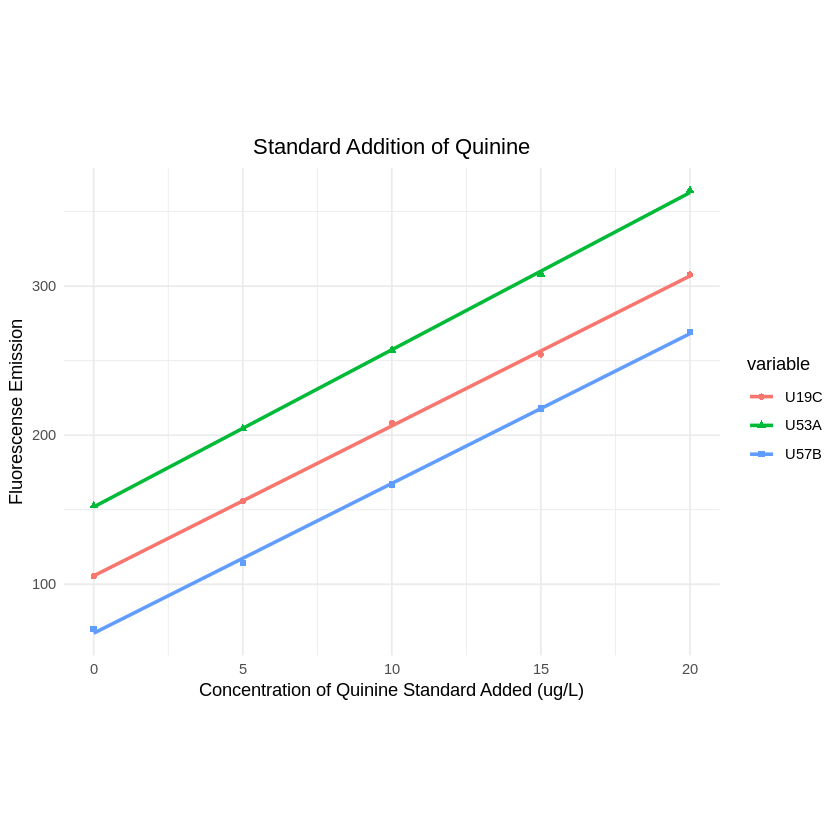

In [21]:
theme_set(theme_minimal())
ggplot(Q.melt, aes(x = conc_added, y = value, color = variable, shape = variable)) + 
    geom_point() + 
    stat_smooth(method = 'lm', se=F) + # se=F removes weird grey bars
    xlab("Concentration of Quinine Standard Added (ug/L)") +
    ylab("Fluorescense Emission") +
    ggtitle("Standard Addition of Quinine", subtitle = NULL) +
    theme(plot.title = element_text(hjust = 0.5)) +
    coord_fixed(ratio = 0.05)


In [22]:
# Run regression models with lm()
R.U19C <- lm(Q$conc_added ~ Q$U19C)
R.U53A <- lm(Q$conc_added ~ Q$U53A)
R.U57B <- lm(Q$conc_added ~ Q$U57B)

R.U19C$coefficients
R.U53A$coefficients
R.U57B$coefficients

# you can also get more information than you need
#summary(R.control)
#summary(R.unknown)

(Intercept)       Q$U19C 
-10.49578564   0.09937543

(Intercept)       Q$U53A 
-14.39637514   0.09480579

(Intercept)      Q$U57B 
-6.67049286  0.09943628

In [24]:
# From the absolute value of the x-intercept of each (e.g. R.control$coefficients) we can calculate the concentration
U19C <- round(abs(R.U19C$coefficients[1]),4)
U53A <- round(abs(R.U53A$coefficients[1]),4)
U57B <- round(abs(R.U57B$coefficients[1]),4)

# µg/L is already in ppb, so we just need to account for our 1/2 dilution when we prepared our 10 mL solutions and
# our 1/25 dilution preparing our unknown and control...
U19C*2*25
U53A*2*25
U57B*2*25

(Intercept) 
     524.79

(Intercept) 
     719.82

(Intercept) 
    333.525

## Results
---
## U19C: 0.5248 ppm
## U53A: 0.7198 ppm
## U57B: 0.3335 ppm

#### For the Control Sample

In [29]:
print(paste("Control: ",control[1]))
print(paste("Control + 4 mL (20 µg/L): ",control[2]))

[1] "Control:  113.49"
[1] "Control + 4 mL (20 µg/L):  312.06"


Standard Addition with one addition: (note how the slope cancels)
\begin{equation}
S_x = mC_x
\end{equation}


\begin{equation}
S_{x+s} = m(C_x+C_s)
\end{equation}


\begin{equation}
\frac{S_x}{S_{x+s}} = \frac{mC_x}{m(C_x+C_s)}
\end{equation}


\begin{equation}
\frac{113.49}{312.06} = \frac{C_x}{C_x+20}
\end{equation}

\begin{equation}
S_{ratio} = \frac{C_x}{C_x+20}
\end{equation}

\begin{equation}
C_x = \frac{S_{ratio}*20}{1-S_{ratio}}
\end{equation}


In [33]:
Sratio = 113.49/312.06
Cx = (Sratio*20)/(1-Sratio)

# µg/L is already in ppb, so we just need to account for our 1/2 dilution when we prepared our 10 mL solutions and
# our 1/25 dilution preparing our unknown and control...

Cx*2*25

[1] 571.5365

## Control: 0.5715 ppm